# German Credit Dataset analysis using Aequitas #

### Installing aequitas ###
In your python console enter the following line to install aequitas aif360 to load the dataset.

pip install aequitas aif360

### Loading the german dataset ###
[add about the german dataset]


In [2]:
import pandas as pd
import seaborn as sns
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

# import warnings; warnings.simplefilter('ignore')

%matplotlib inline



In [3]:
## loading the dataset through API 
from aif360.datasets import GermanDataset

german_dataset = GermanDataset()

dfgerman = pd.DataFrame(german_dataset.convert_to_dataframe()[0])
# remove labels
dfgerman = dfgerman.drop(columns=german_dataset.label_names)
dfgerman['label'] = tuple(german_dataset.labels[:, 0])

dfgerman

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,sex,status=A11,status=A12,...,housing=A153,skill_level=A171,skill_level=A172,skill_level=A173,skill_level=A174,telephone=A191,telephone=A192,foreign_worker=A201,foreign_worker=A202,label
0,6.0,1169.0,4.0,4.0,1.0,2.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
1,48.0,5951.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,12.0,2096.0,2.0,3.0,1.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,42.0,7882.0,2.0,4.0,1.0,1.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,24.0,4870.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12.0,1736.0,3.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
996,30.0,3857.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
997,12.0,804.0,4.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
998,45.0,1845.0,4.0,4.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [4]:
## with Pandas
filepath = 'D:/INFO284/anacondabase/Lib/site-packages/aif360/data/raw/german/german.data'

column_names = ['status', 'month', 'credit_history',
    'purpose', 'credit_amount', 'savings', 'employment',
    'investment_as_income_percentage', 'personal_status',
    'other_debtors', 'residence_since', 'property', 'age',
    'installment_plans', 'housing', 'number_of_credits',
    'skill_level', 'people_liable_for', 'telephone',
    'foreign_worker', 'credit']
na_values=[]
german_df = pd.read_csv(filepath, sep=' ', header=None, names=column_names,
                     na_values=na_values)
german_df.shape

(1000, 21)

In [5]:
german_df.head()

,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,personal_status,other_debtors,...,property,age,installment_plans,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,credit
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


### Exploring the German Dataset ###
age
sex

In [6]:
#pallet = sns.diverging_palette(240, 10, n=9)

In [7]:
## mapping age 1 >=25
german_df['age_mapped'] = german_df['age'].apply(lambda x: 'older' if x>=25 else 'younger')
german_df.head()

,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,personal_status,other_debtors,...,age,installment_plans,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,credit,age_mapped
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,67,A143,A152,2,A173,1,A192,A201,1,older
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,22,A143,A152,1,A173,1,A191,A201,0,younger
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,49,A143,A152,1,A172,2,A191,A201,1,older
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,45,A143,A153,1,A173,2,A191,A201,1,older
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,53,A143,A153,2,A173,2,A191,A201,0,older


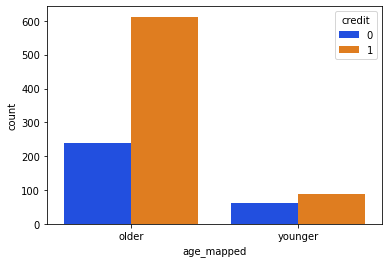

In [8]:
#byage
by_age = sns.countplot(x="age_mapped", hue="credit", data=german_df, palette="bright")

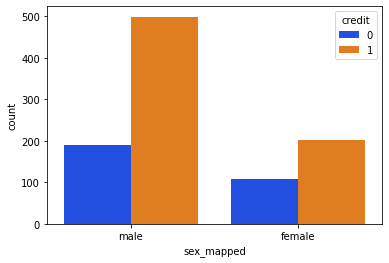

In [9]:
# A91 : male : divorced/separated
# A92 : female : divorced/separated/married
# A93 : male : single
# A94 : male : married/widowed
# A95 : female : single 
malecat = ['A91','A93','A94']
german_df['sex_mapped'] = german_df['personal_status'].apply(lambda x: "male" if x in malecat else "female")

by_sex = sns.countplot(x="sex_mapped", hue="credit", data=german_df, palette="bright")

### Using Aequitas to audit the dataset ###
Before the dta can be used with aequitas it requies preprocessing
The input dataframe must comtain score for labels and categories must be strings
For detailed requirements check https://github.com/dssg/aequitas#input-data

In [10]:
german_df = german_df.rename(columns={'credit':'label_value'}) ## label is the machine original label value

In [37]:
#trying SVM
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

svcClf =  make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto'))

german_x = german_df.drop('label_value',  axis=1)
german_y = german_df['label_value']

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(german_x)
german_x = enc.transform(german_x)

german_x_train,german_x_test, german_y_train, german_y_test = train_test_split(german_x, german_y, test_size = 0.33)

svcClf = svcClf.fit(german_x_train,german_y_train)

svc_score = svcClf.predict(german_x)
svcClf.score(german_x_test,german_y_test)


0.6848484848484848

In [38]:
german_df['score'] = svc_score ## score is the machine learning scoring

In [39]:
german_df.dtypes

status                             object
month                               int64
credit_history                     object
purpose                            object
credit_amount                       int64
savings                            object
employment                         object
investment_as_income_percentage     int64
personal_status                    object
other_debtors                      object
residence_since                     int64
property                           object
age                                 int64
installment_plans                  object
housing                            object
number_of_credits                   int64
skill_level                        object
people_liable_for                   int64
telephone                          object
foreign_worker                     object
label_value                         int64
age_mapped                         object
sex_mapped                         object
score                             

In [40]:
import aequitas.preprocessing 
# *input_data* matches CLI input data norms.
processed_german_df, _ = aequitas.preprocessing.preprocess_input_df(german_df)

In [41]:
## ## Define Attributes to Audit and Reference Group for each Attribute 
attributes_and_reference_groups={'age_mapped':'older', 'sex_mapped':'male'}
attributes_to_audit = list(attributes_and_reference_groups.keys())

In [48]:
#define the metrics
metrics = ['fpr']
disparity_tolerance = 1.30

In [49]:
processed_german_df

,status,month,credit_history,purpose,credit_amount,savings,employment,investment_as_income_percentage,personal_status,other_debtors,...,housing,number_of_credits,skill_level,people_liable_for,telephone,foreign_worker,label_value,age_mapped,sex_mapped,score
0,A11,4.00-12.00,A34,A43,250.00-1365.50,A65,A75,3.00-4.00,A93,A101,...,A152,1.00-2.00,A173,1.00-2.00,A192,A201,1,older,male,1.0
1,A12,24.00-72.00,A32,A43,3972.25-18424.00,A61,A73,1.00-2.00,A92,A101,...,A152,1.00-2.00,A173,1.00-2.00,A191,A201,0,younger,female,0.0
2,A14,4.00-12.00,A34,A46,1365.50-2319.50,A61,A74,1.00-2.00,A93,A101,...,A152,1.00-2.00,A172,1.00-2.00,A191,A201,1,older,male,1.0
3,A11,24.00-72.00,A32,A42,3972.25-18424.00,A61,A74,1.00-2.00,A93,A103,...,A153,1.00-2.00,A173,1.00-2.00,A191,A201,1,older,male,1.0
4,A11,18.00-24.00,A33,A40,3972.25-18424.00,A61,A73,2.00-3.00,A93,A101,...,A153,1.00-2.00,A173,1.00-2.00,A191,A201,0,older,male,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,4.00-12.00,A32,A42,1365.50-2319.50,A61,A74,2.00-3.00,A92,A101,...,A152,1.00-2.00,A172,1.00-2.00,A191,A201,1,older,female,1.0
996,A11,24.00-72.00,A32,A41,2319.50-3972.25,A61,A73,3.00-4.00,A91,A101,...,A152,1.00-2.00,A174,1.00-2.00,A192,A201,1,older,male,1.0
997,A14,4.00-12.00,A32,A43,250.00-1365.50,A61,A75,3.00-4.00,A93,A101,...,A152,1.00-2.00,A173,1.00-2.00,A191,A201,1,older,male,1.0
998,A11,24.00-72.00,A32,A43,1365.50-2319.50,A61,A73,3.00-4.00,A93,A101,...,A153,1.00-2.00,A173,1.00-2.00,A192,A201,0,younger,male,0.0


In [50]:
## Running qequitas 

# Initialize Aequitas
g = Group()
b = Bias()

# get_crosstabs returns a dataframe of the group counts and group value bias metrics.
xtab, _ = g.get_crosstabs(processed_german_df, attr_cols=attributes_to_audit)
bdf = b.get_disparity_predefined_groups(xtab, original_df=processed_german_df, ref_groups_dict=attributes_and_reference_groups)

#aq_group = Group()
#xtab, _ = aq_group.get_crosstabs(processed_german_df)

get_disparity_predefined_group()


In [51]:
import aequitas.plot as ap


In [52]:
ap.disparity(bdf, metrics, 'age_mapped', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)

In [53]:
ap.disparity(bdf, metrics, 'sex_mapped', fairness_threshold = disparity_tolerance)

alt.LayerChart(...)